In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Google Colab에서 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

Saving auto-mpg.csv to auto-mpg (3).csv


In [ ]:
# 데이터 확인

print(df.head())
print(df.info())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [ ]:
df.horsepower.unique()  # 교유한 값 확인 가능 (중복빼고)

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# 결측값 처리

df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()
df = df.astype({'horsepower': 'float64'})

# 'car name' 열 제거
df.drop('car name', axis=1, inplace=True)
# df.drop(columns = ['car name'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB
None


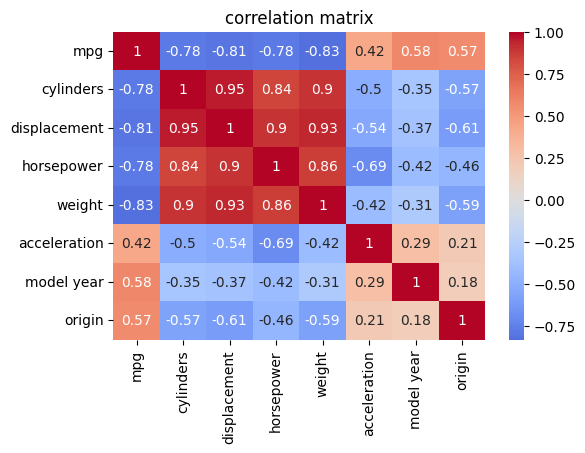

In [ ]:
# 탐색적 데이터 분석
# center = 0 , 색상 맵의 중앙값이 0.  0 보다 큰 값과 작은 값이 다른 색으로 표시
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm' , center = 0)
plt.title('correlation matrix')
plt.show()

In [ ]:
# 변수 선정 (상관계수 기반)

target_variable = 'mpg'
correlation_threshold = 0.5
correlated_features = df.corr()[target_variable][abs(df.corr()[target_variable]) > correlation_threshold].index.tolist()

# 파생 변수 생성: 예를 들어, 중량대비 마력비

df['hp_to_weight'] = df['horsepower'] / df['weight']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_to_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591


In [ ]:
# 분석용 데이터셋 구축

selected_features = correlated_features + ['hp_to_weight']

analysis_df = df[selected_features]


In [ ]:
# 데이터 표준화

scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns = [target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환

scaled_df = pd.DataFrame(scaled_features, columns = analysis_df.columns.drop(target_variable))

 # 데이터셋 확인
print(scaled_df.head())

   cylinders  displacement  horsepower    weight  model year    origin  \
0   1.483947      1.077290    0.664133  0.620540   -1.625315 -0.716641   
1   1.483947      1.488732    1.574594  0.843334   -1.625315 -0.716641   
2   1.483947      1.182542    1.184397  0.540382   -1.625315 -0.716641   
3   1.483947      1.048584    1.184397  0.536845   -1.625315 -0.716641   
4   1.483947      1.029447    0.924265  0.555706   -1.625315 -0.716641   

   hp_to_weight  
0      0.382496  
1      1.661177  
2      1.488456  
3      1.494892  
4      0.971505  


In [ ]:
df.col

,mpg,cylinders,displacement,horsepower,weight,model year,origin,hp_to_weight
0,18.0,8,307.0,130.0,3504,70,1,0.037100
1,15.0,8,350.0,165.0,3693,70,1,0.044679
2,18.0,8,318.0,150.0,3436,70,1,0.043655
3,16.0,8,304.0,150.0,3433,70,1,0.043694
4,17.0,8,302.0,140.0,3449,70,1,0.040591
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,82,1,0.030824
394,44.0,4,97.0,52.0,2130,82,2,0.024413
395,32.0,4,135.0,84.0,2295,82,1,0.036601
396,28.0,4,120.0,79.0,2625,82,1,0.030095


In [ ]:
# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

KeyError: "['mpg'] not found in axis"